In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import time
import datetime
import urllib3
# import scipy as sci
import scipy.stats as stats
import torch
import torch.nn as nn
import torch.nn.functional as F

from time import localtime, strftime

from multiprocessing import cpu_count
from multiprocessing import Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pdb
from pdb import set_trace as bp


In [2]:
#%matplotlib notebook
%matplotlib inline


In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(15, 10))

In [3]:
nasdaq = pd.read_pickle('nasdaq_qqq_yahoo.pckl')


In [4]:
nasdaq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'open_change', 'open_change_pct', 'next_day_open_change',
       'next_day_open_change_pct', 'open_change_wrt_close',
       'open_change_wrt_close_pct', 'open_change_wrt_high',
       'open_change_wrt_low', 'open_change_wrt_volume',
       'next_day_open_change_wrt_close', 'next_day_open_change_wrt_close_pct',
       'next_day_open_change_wrt_high', 'next_day_open_change_wrt_low',
       'next_day_open_change_wrt_volume', 'close_change_pct', 'close_change',
       'high_change_pct', 'high_change', 'low_change_pct', 'low_change',
       'volume_change_pct', 'volume_change', 'high_low_range',
       'high_low_range_with_ref_open', 'high_low_range_with_ref_open_pct',
       'high_low_range_with_ref_close', 'high_low_range_with_ref_close_pct',
       'gt_1', 'gt_1.5', 'gt_2.5'],
      dtype='object')

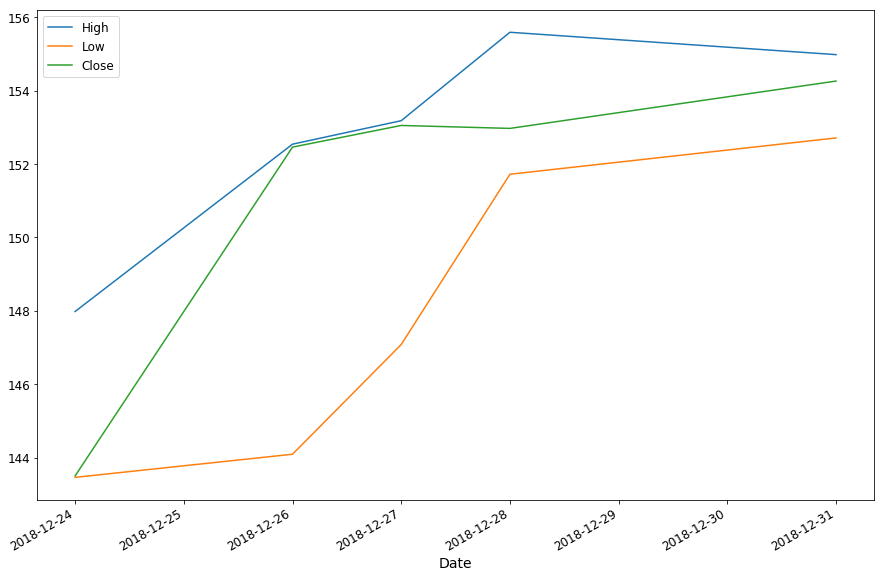

In [5]:
#y = nasdaq[['Open', 'High', 'Low', 'Close']]
#x = nasdaq['Date']
#data_df = pd.DataFrame(y, )
nasdaq[nasdaq.index.size - 5:nasdaq.index.size].plot(x='Date', 
                                                     y=['High', 'Low', 'Close'],
                                                     kind='line')


In [6]:
data = nasdaq[nasdaq.index.size - 5:nasdaq.index.size]

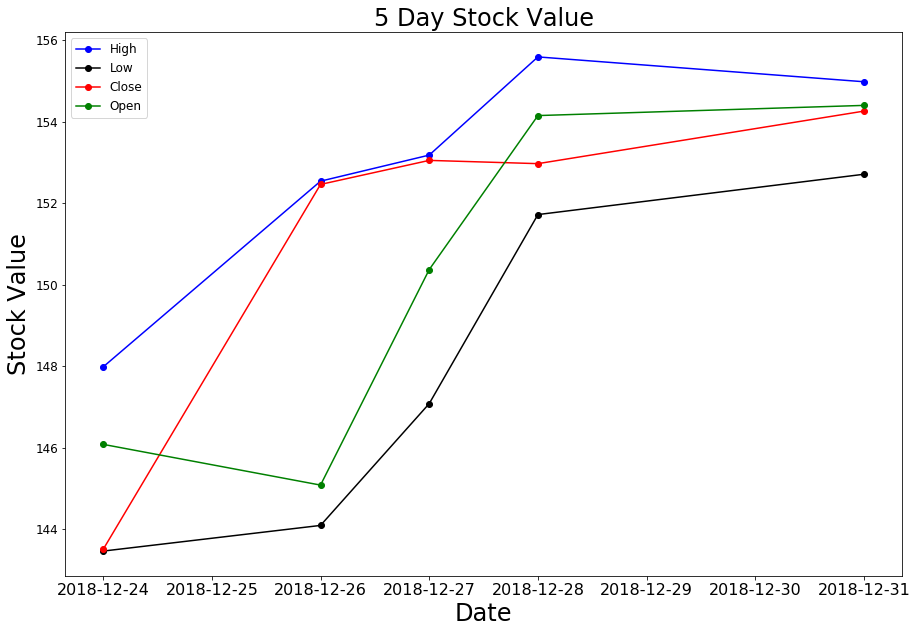

In [34]:
plt.figure()
plt.plot(data['Date'].values, data['High'], '-ob', label='High')
plt.plot(data['Date'].values, data['Low'], '-ok', label='Low')
plt.plot(data['Date'].values, data['Close'], '-or', label='Close')
plt.plot(data['Date'].values, data['Open'], '-og', label='Open')
plt.legend()
plt.title('5 Day Stock Value', fontsize=24)
plt.ylabel('Stock Value', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.xticks(fontsize=16)
plt.savefig(fname='latex/figures/' + figure_name + '.pdf', 
            format='pdf', dpi=300)
plt.show()
figure_name = 'plot_with_daily_values'


### Compiling Test and Training Results into Graphs

In [3]:
model_names = ['Random Forest', 'Lenet-5', 
               'AvgLenet-5', 'ResNet', 'LSTM']
score_names = ['Precision 0', 'Recall 0', 
               'f1-score 0', 'Precision 1', 
               'Recall 1', 'f1-score 1', 'accuracy']


In [4]:
training_results = pd.DataFrame(index=model_names, columns=['Precision 0', 'Recall 0', 
                                                            'f1-score 0', 'Precision 1', 
                                                            'Recall 1', 'f1-score 1', 
                                                            'accuracy'], dtype=np.float32)
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training_results.loc['Random Forest'] = [0.90, 0.89, 0.89, 0.79, 0.81, 0.80, 0.86]
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.9,0.89,0.89,0.79,0.81,0.8,0.86
Lenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
training_results.loc['Lenet-5'] = [0.85, 0.88, 0.87, 0.76, 0.72, 0.74, 0.84]
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.90,0.89,0.89,0.79,0.81,0.80,0.86
Lenet-5,0.85,0.88,0.87,0.76,0.72,0.74,0.84
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
training_results.loc['AvgLenet-5'] = [0.88, 0.88, 0.88, 0.78, 0.77, 0.77, 0.84]
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.90,0.89,0.89,0.79,0.81,0.80,0.86
Lenet-5,0.85,0.88,0.87,0.76,0.72,0.74,0.84
AvgLenet-5,0.88,0.88,0.88,0.78,0.77,0.77,0.84
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
training_results.loc['ResNet'] = [0.85, 0.85, 0.85, 0.72, 0.72, 0.72, 0.81]
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.90,0.89,0.89,0.79,0.81,0.80,0.86
Lenet-5,0.85,0.88,0.87,0.76,0.72,0.74,0.84
AvgLenet-5,0.88,0.88,0.88,0.78,0.77,0.77,0.84
ResNet,0.85,0.85,0.85,0.72,0.72,0.72,0.81
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
training_results.loc['LSTM'] = [0.91, 0.89, 0.74, 0.96, 0.82, 0.88, 0.93]
training_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.90,0.89,0.89,0.79,0.81,0.80,0.86
Lenet-5,0.85,0.88,0.87,0.76,0.72,0.74,0.84
AvgLenet-5,0.88,0.88,0.88,0.78,0.77,0.77,0.84
ResNet,0.85,0.85,0.85,0.72,0.72,0.72,0.81
LSTM,0.91,0.89,0.74,0.96,0.82,0.88,0.93


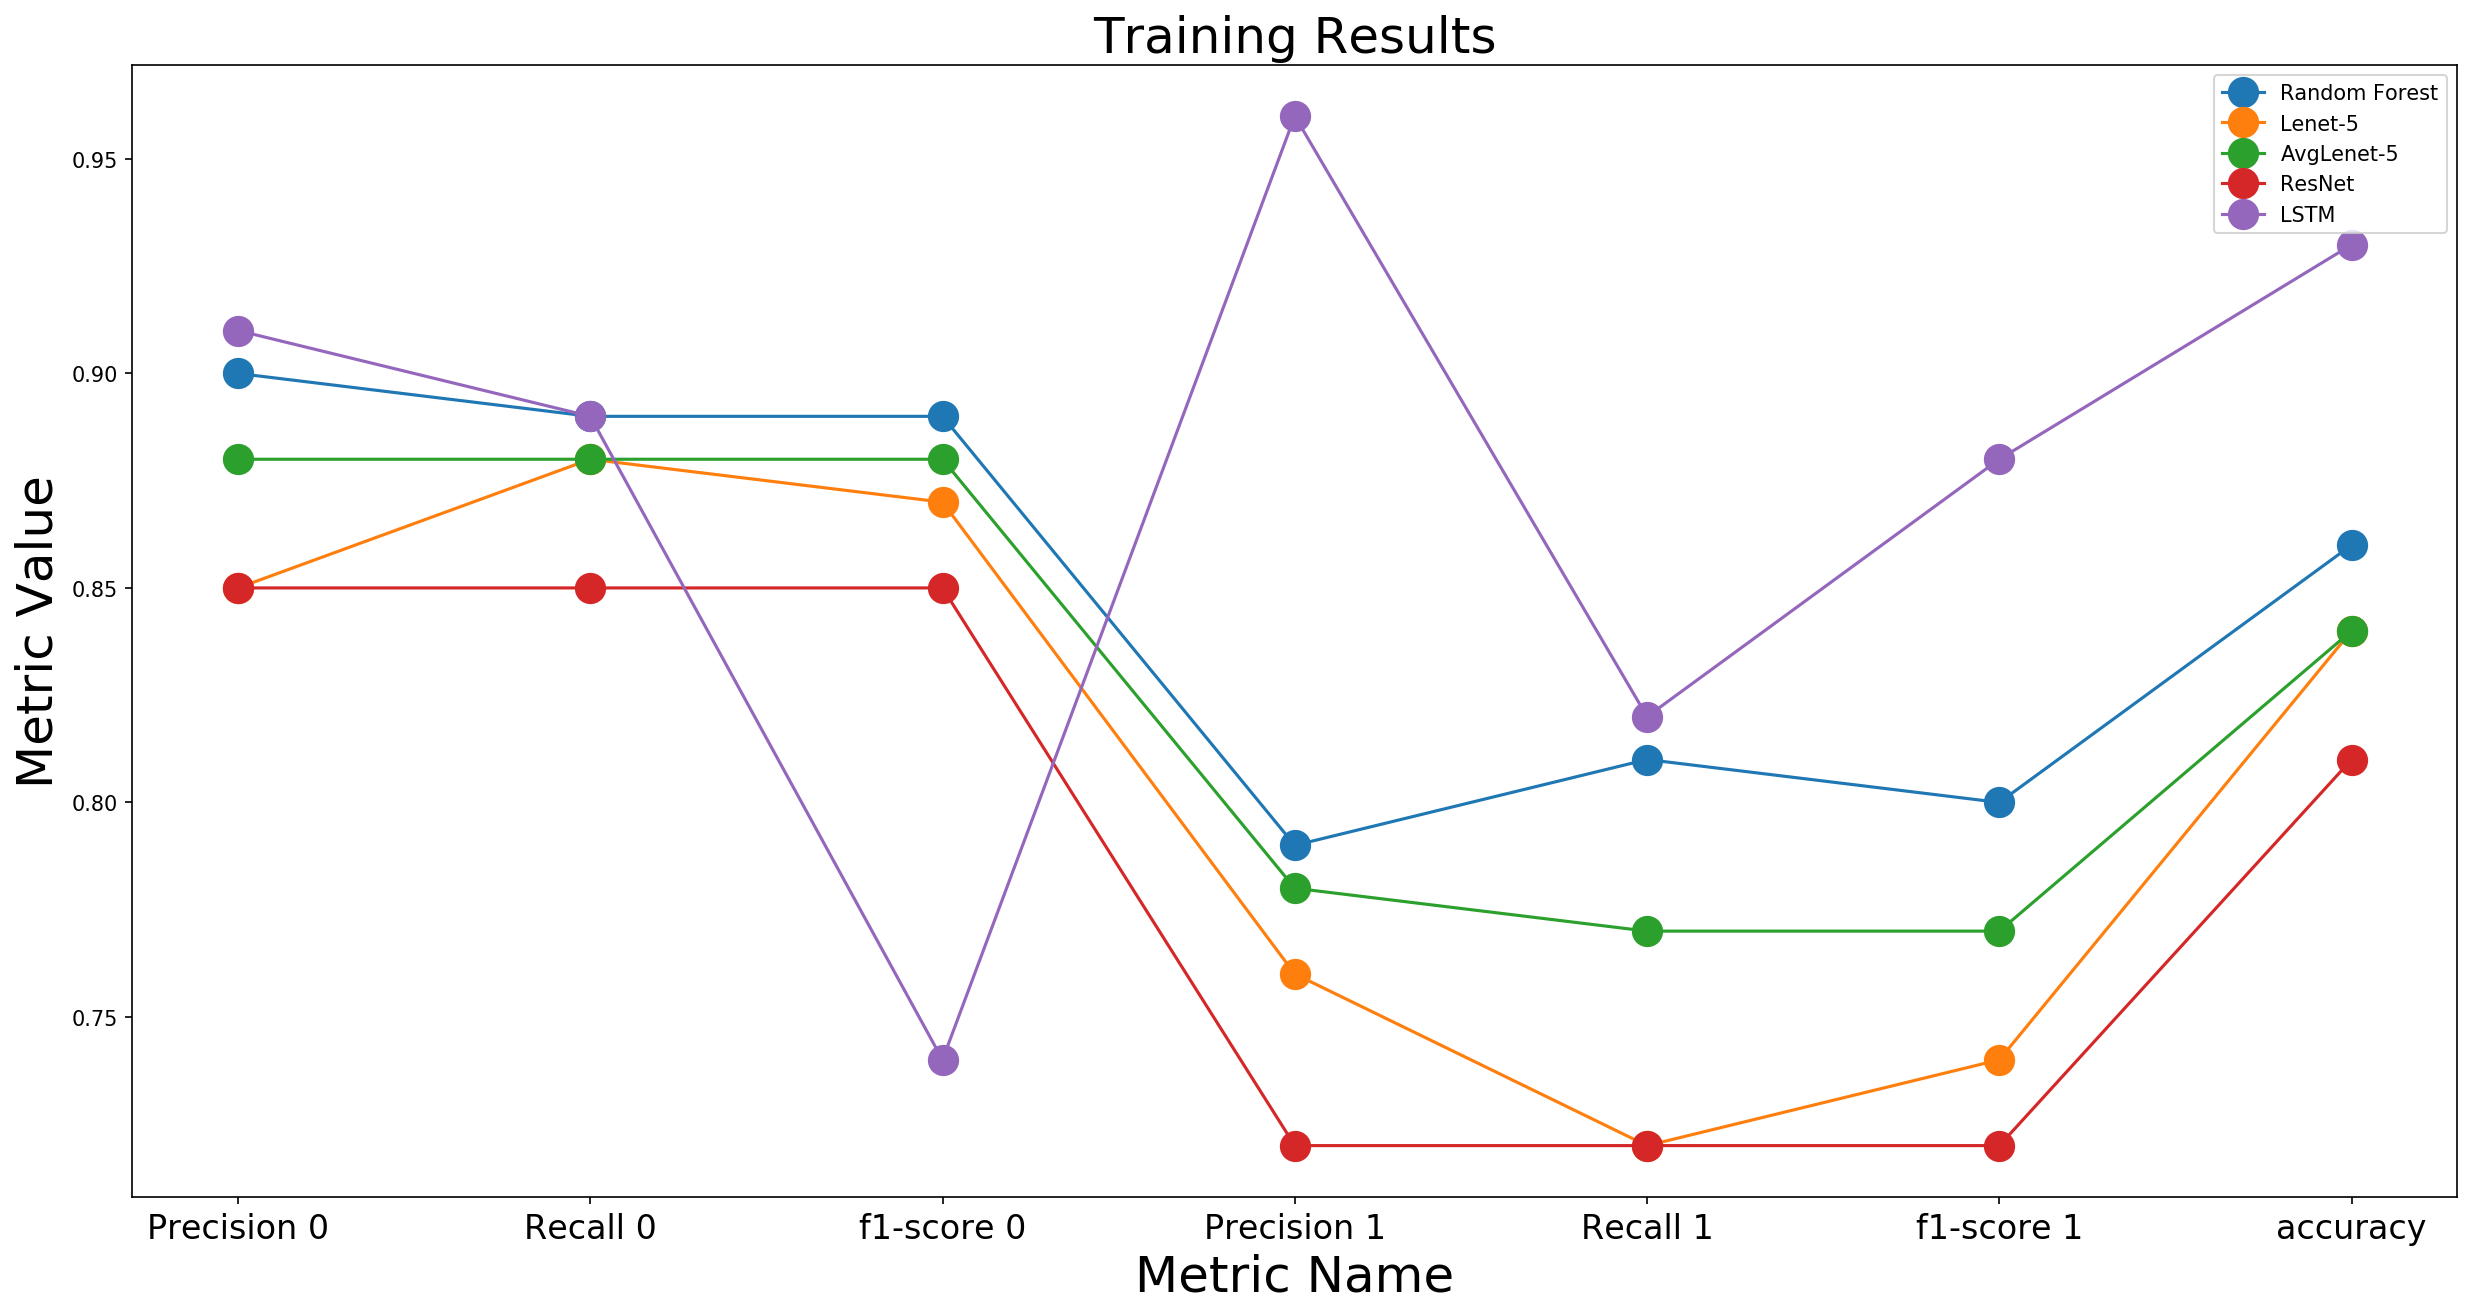

In [18]:
plt.figure(figsize=(20,10), dpi=150)
plt.title('Training Results', fontsize=24)
plt.ylabel('Metric Value', fontsize=24)
plt.xlabel('Metric Name', fontsize=24)
plt.xticks(fontsize=16)
for value, name in zip(training_results.values, model_names):
    
    plt.plot(score_names, value, 'o-', label=name, markersize=14)
plt.legend()
plt.savefig(fname='latex/figures/' + 'all_training_results' + '.pdf',
            format='pdf', dpi=300)
plt.show()

In [19]:
model_names = ['Random Forest', 'Lenet-5', 'AvgLenet-5', 'ResNet', 'LSTM']
test_results = pd.DataFrame(index=model_names, columns=['Precision 0', 'Recall 0',
                                                        'f1-score 0', 'Precision 1', 
                                                        'Recall 1', 'f1-score 1',
                                                        'accuracy'], dtype=np.float32)
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_results.loc['Random Forest'] = [0.87, 0.91, 0.89, 0.83, 0.75, 0.79, 0.85]
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.87,0.91,0.89,0.83,0.75,0.79,0.85
Lenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test_results.loc['Lenet-5'] = [0.87, 0.88, 0.88, 0.79, 0.77, 0.78, 0.84]
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.87,0.91,0.89,0.83,0.75,0.79,0.85
Lenet-5,0.87,0.88,0.88,0.79,0.77,0.78,0.84
AvgLenet-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
test_results.loc['AvgLenet-5'] = [0.87, 0.87, 0.87, 0.77, 0.7, 0.77, 0.83]
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.87,0.91,0.89,0.83,0.75,0.79,0.85
Lenet-5,0.87,0.88,0.88,0.79,0.77,0.78,0.84
AvgLenet-5,0.87,0.87,0.87,0.77,0.70,0.77,0.83
ResNet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
test_results.loc['ResNet'] = [0.83, 0.82, 0.83, 0.69, 0.70, 0.70, 0.78]
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.87,0.91,0.89,0.83,0.75,0.79,0.85
Lenet-5,0.87,0.88,0.88,0.79,0.77,0.78,0.84
AvgLenet-5,0.87,0.87,0.87,0.77,0.70,0.77,0.83
ResNet,0.83,0.82,0.83,0.69,0.70,0.70,0.78
LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
test_results.loc['LSTM'] = [0.80, 0.87, 0.83, 0.73, 0.62, 0.67, 0.78]
test_results

,Precision 0,Recall 0,f1-score 0,Precision 1,Recall 1,f1-score 1,accuracy
Random Forest,0.87,0.91,0.89,0.83,0.75,0.79,0.85
Lenet-5,0.87,0.88,0.88,0.79,0.77,0.78,0.84
AvgLenet-5,0.87,0.87,0.87,0.77,0.70,0.77,0.83
ResNet,0.83,0.82,0.83,0.69,0.70,0.70,0.78
LSTM,0.80,0.87,0.83,0.73,0.62,0.67,0.78


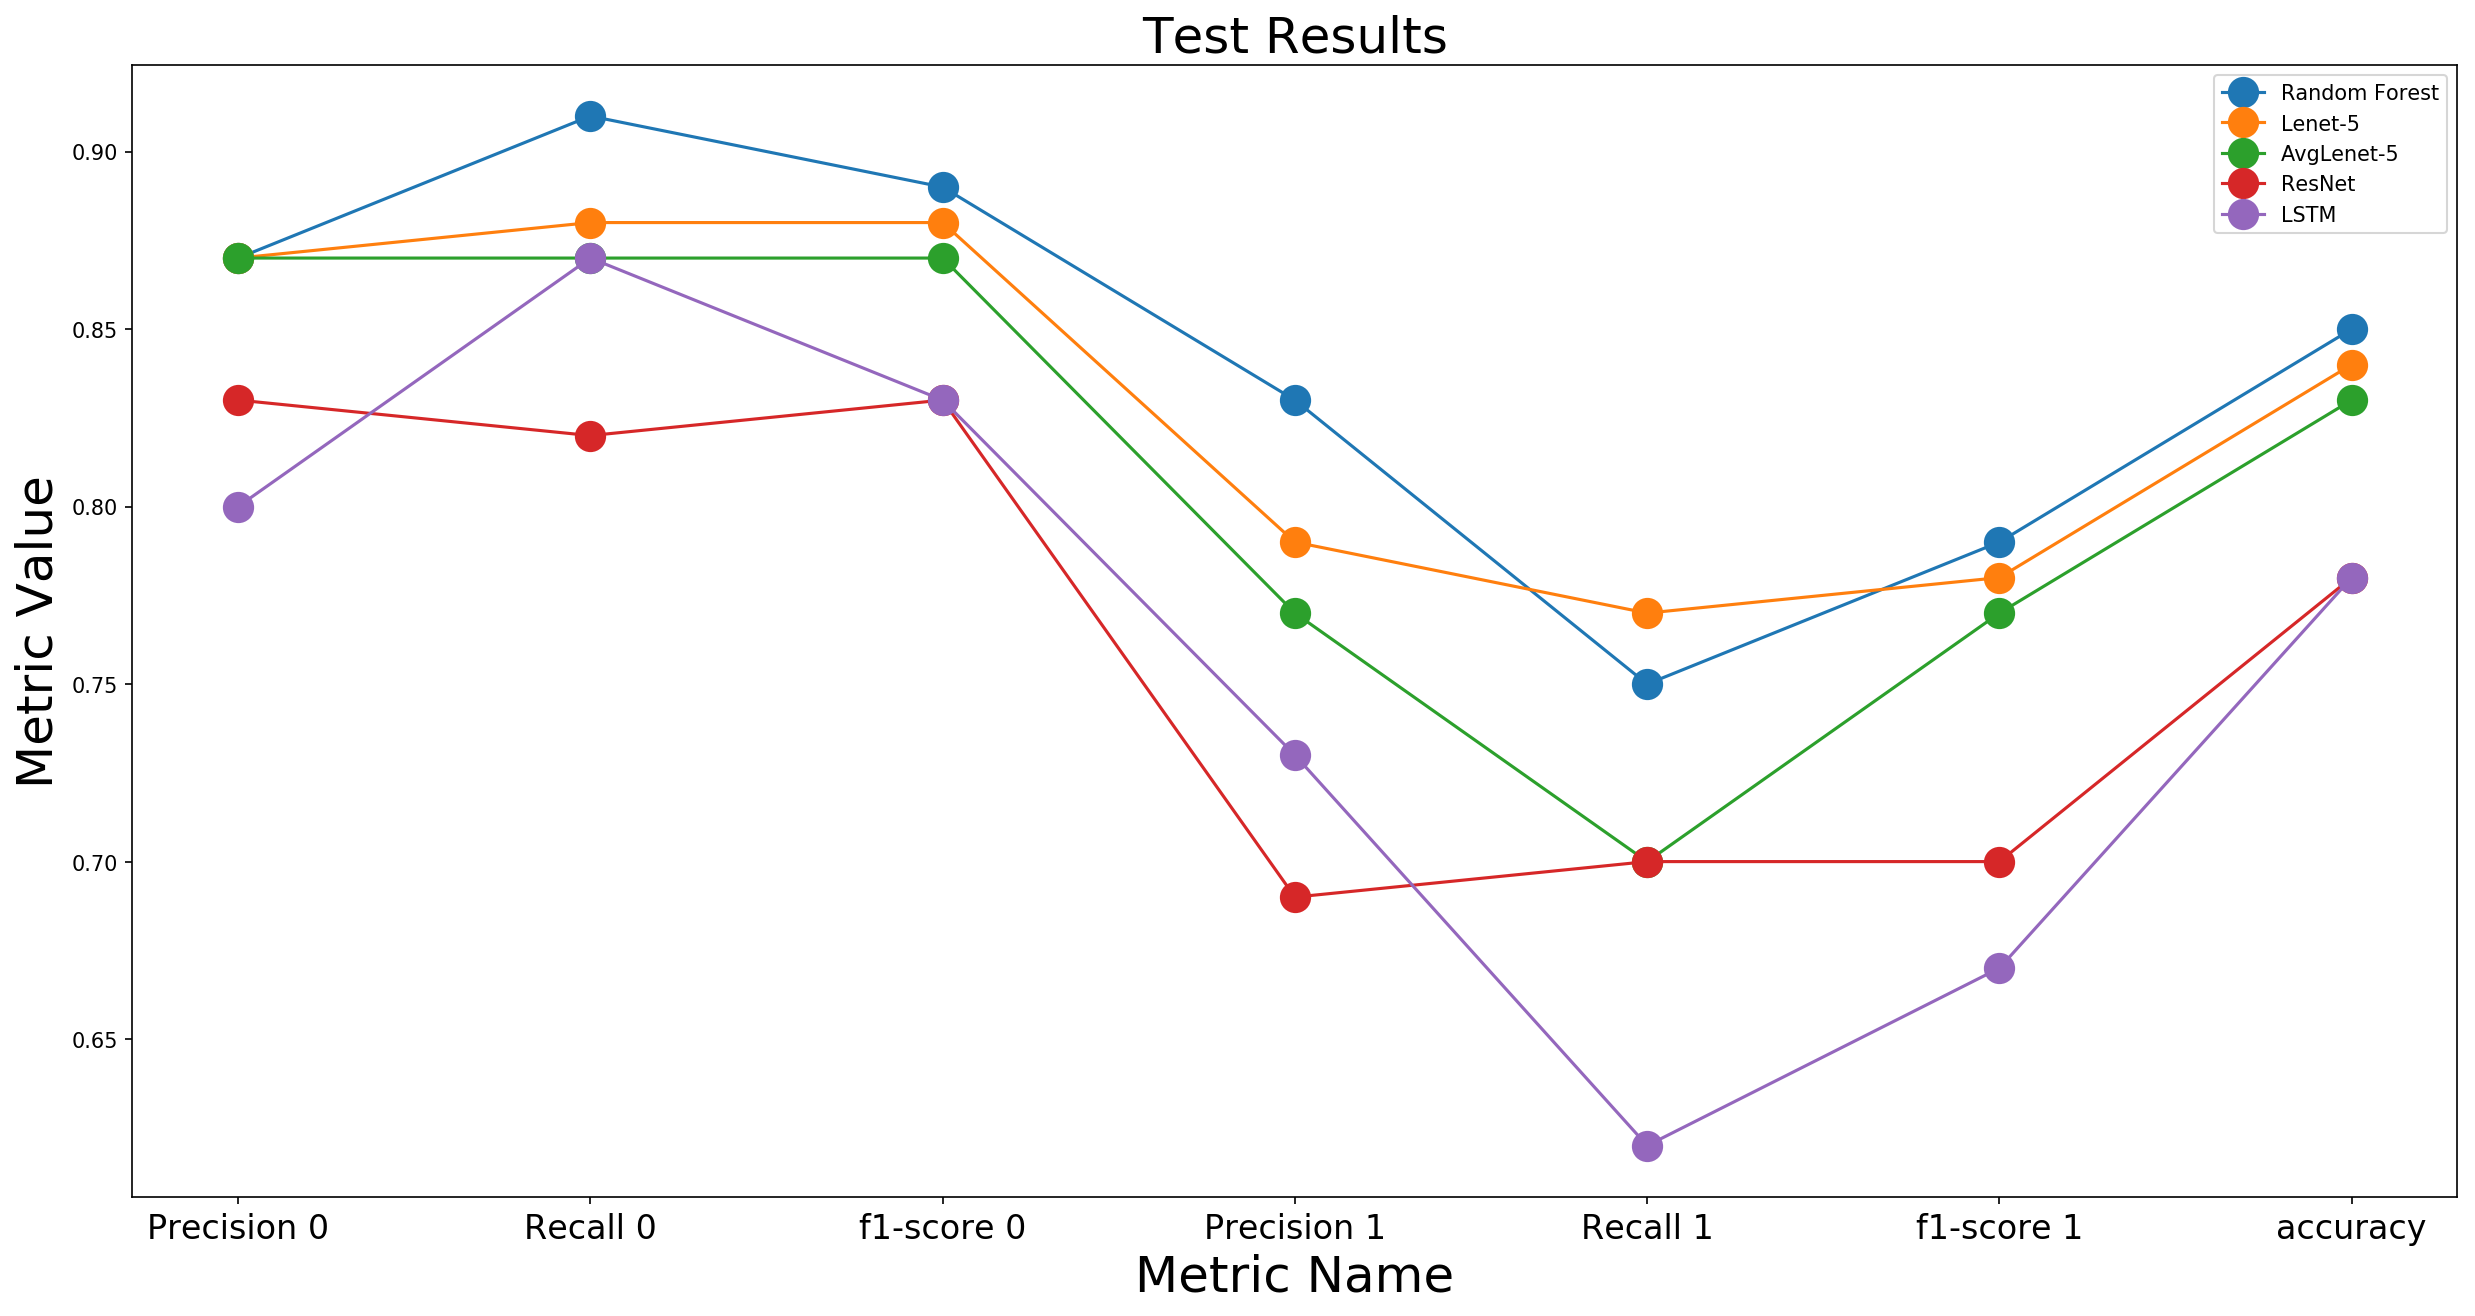

In [26]:
plt.figure(figsize=(20,10), dpi=150)
plt.title('Test Results', fontsize=24)
plt.ylabel('Metric Value', fontsize=24)
plt.xlabel('Metric Name', fontsize=24)
plt.xticks(fontsize=16)
for value, name in zip(test_results.values, model_names):
    
    plt.plot(score_names, value, 'o-', label=name, markersize=14)
plt.legend()
plt.savefig(fname='latex/figures/' + 'all_test_results' + '.pdf', 
            format='pdf', dpi=300)
plt.show()